In [19]:
from functools import partial

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib
from pytorch_lightning import Trainer, seed_everything
from pytorch_lightning.callbacks import ModelCheckpoint, TQDMProgressBar

from models.data import JSRTDataModule, CheXpertDataModule, CLEVRNDataset, SynthCardDataModule, CURVASDataModule
from models.mae.mae import ViTAE
from models.encoders import CNNEncoder, DinoViT_16, DinoViT_8, Dinov2ViT_14, ResNet34_8x8, get_resnet34_encoder
from models.segmentation import ObjectSpecificSegmentation

from pytorch_lightning.loggers import WandbLogger
from pathlib import Path

In [ ]:
# model = ViTAE(
#     model_kwargs={
#         'img_size': 128,
#         'embed_dim': 768,
#         'in_chans': 1,          # for clevr
#         'num_heads': 12,
#         'depth': 12,
#         'decoder_embed_dim': 512,
#         'decoder_depth': 8,
#         'decoder_num_heads': 16,
#         'norm_layer': partial(nn.LayerNorm, eps=1e-6),
#         'mlp_ratio': 4.0,
#         'patch_size': 8,
#         'norm_pix_loss': False,
#     },
#     learning_rate=1e-4,
# )

In [21]:
#saved_model.eval()
# dinovit16 = DinoViT_16()
encoder = DinoViT_8()
# encoder = ResNet34_8x8(get_resnet34_encoder())
# dino2 = Dinov2ViT_14()
# oss = ObjectSpecificSegmentation(encoder=dinovit8, num_slots=4, num_iterations=3, num_classes=4, 
#                                  slot_dim=128, decoder_type='cnn', 
#                                  learning_rate=1e-4, freeze_encoder=False, temperature=1, 
#                                  log_images=True, lr_warmup=True, include_seg_loss=False,
#                                  slot_attn_type='probabilistic', probabilistic_sample=True, image_chans=1, 
#                                  image_resolution=128, 
#                                  embedding_dim=384, embedding_shape=(16, 16),
#                                  include_pos_embed=False, patch_size=8, num_patches=256,
#                                  slot_attn_heads=1, decoder_blocks=4, decoder_heads=4, 
#                                  decoder_dim=128, autoregressive=False, label_smoothing=0.0)
# oss.load_state_dict(state)
# oss = ObjectSpecificSegmentation.load_from_checkpoint('/vol/bitbucket/bc1623/project/semi_supervised_uncertainty/bash_scripts/runs/lightning_logs/synthetic_cardiac/synthetic_cardiac/high_crop_test_2/checkpoints/epoch=2199-step=66000.ckpt',
#                                 encoder=encoder, num_slots=4, num_iterations=3, num_classes=4, 
#                                  slot_dim=32, decoder_type='transformer', 
#                                  learning_rate=1e-4, freeze_encoder=True, temperature=1, 
#                                  log_images=True, lr_warmup=True, include_seg_loss=False,
#                                  slot_attn_type='probabilistic', probabilistic_sample=True, image_chans=1, 
#                                  image_resolution=128, 
#                                  embedding_dim=384, embedding_shape=(16, 16),
#                                  include_pos_embed=True, patch_size=8, num_patches=256,
#                                  slot_attn_heads=2, decoder_blocks=4, decoder_heads=8, 
#                                  decoder_dim=128, autoregressive=False, label_smoothing=0.0)

oss = ObjectSpecificSegmentation.load_from_checkpoint('/vol/bitbucket/bc1623/project/semi_supervised_uncertainty/bash_scripts/runs/lightning_logs/chexray_final/chexray_final/42_cnn_seg/checkpoints/epoch=4399-step=61600.ckpt',
                                encoder=encoder, num_slots=4, num_iterations=3, num_classes=4, 
                                 slot_dim=32, decoder_type='cnn', 
                                 learning_rate=1e-4, freeze_encoder=True, temperature=1, 
                                 log_images=True, lr_warmup=True, include_seg_loss=True,
                                 slot_attn_type='probabilistic', probabilistic_sample=True, image_chans=1, 
                                 image_resolution=128, 
                                 embedding_dim=384, embedding_shape=(16, 16),
                                 include_pos_embed=True, patch_size=8, num_patches=256,
                                 slot_attn_heads=2, decoder_blocks=4, decoder_heads=8, 
                                 decoder_dim=64, autoregressive=False, label_smoothing=0.0)


Using cache found in /homes/bc1623/.cache/torch/hub/facebookresearch_dino_main


RuntimeError: Error(s) in loading state_dict for ObjectSpecificSegmentation:
	Missing key(s) in state_dict: "decoder.decoder.5.weight", "decoder.decoder.5.bias", "decoder.decoder.7.weight", "decoder.decoder.7.bias". 
	Unexpected key(s) in state_dict: "decoder.decoder.8.weight", "decoder.decoder.8.bias", "decoder.decoder.5.upsample.0.weight", "decoder.decoder.5.upsample.0.bias", "decoder.decoder.5.conv.conv.0.weight", "decoder.decoder.5.conv.conv.0.bias", "decoder.decoder.5.conv.conv.1.weight", "decoder.decoder.5.conv.conv.1.bias", "decoder.decoder.5.conv.conv.1.running_mean", "decoder.decoder.5.conv.conv.1.running_var", "decoder.decoder.5.conv.conv.1.num_batches_tracked", "decoder.decoder.6.weight", "decoder.decoder.6.bias". 
	size mismatch for encoder_pos_embed: copying a param with shape torch.Size([1, 784, 384]) from checkpoint, the shape in current model is torch.Size([1, 256, 384]).
	size mismatch for decoder_pos_embeddings: copying a param with shape torch.Size([1, 64, 128]) from checkpoint, the shape in current model is torch.Size([1, 64, 32]).
	size mismatch for slot_attention.slots_mu: copying a param with shape torch.Size([1, 4, 128]) from checkpoint, the shape in current model is torch.Size([1, 4, 32]).
	size mismatch for slot_attention.mu_scale: copying a param with shape torch.Size([1, 4, 128]) from checkpoint, the shape in current model is torch.Size([1, 4, 32]).
	size mismatch for slot_attention.slots_logsigma: copying a param with shape torch.Size([1, 4, 4, 32]) from checkpoint, the shape in current model is torch.Size([1, 2, 4, 16]).
	size mismatch for slot_attention.to_keys: copying a param with shape torch.Size([384, 128]) from checkpoint, the shape in current model is torch.Size([384, 32]).
	size mismatch for slot_attention.to_queries: copying a param with shape torch.Size([4, 128, 128]) from checkpoint, the shape in current model is torch.Size([4, 32, 32]).
	size mismatch for slot_attention.to_values: copying a param with shape torch.Size([384, 128]) from checkpoint, the shape in current model is torch.Size([384, 32]).
	size mismatch for slot_attention.gru.weight_ih: copying a param with shape torch.Size([384, 128]) from checkpoint, the shape in current model is torch.Size([96, 32]).
	size mismatch for slot_attention.gru.weight_hh: copying a param with shape torch.Size([384, 128]) from checkpoint, the shape in current model is torch.Size([96, 32]).
	size mismatch for slot_attention.gru.bias_ih: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for slot_attention.gru.bias_hh: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for slot_attention.mlp.0.weight: copying a param with shape torch.Size([256, 128]) from checkpoint, the shape in current model is torch.Size([256, 32]).
	size mismatch for slot_attention.mlp.2.weight: copying a param with shape torch.Size([128, 256]) from checkpoint, the shape in current model is torch.Size([32, 256]).
	size mismatch for slot_attention.mlp.2.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for slot_attention.layer_norm_slots.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for slot_attention.layer_norm_slots.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for slot_attention.layer_norm_pre_ff.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for slot_attention.layer_norm_pre_ff.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for decoder.decoder.0.conv.0.weight: copying a param with shape torch.Size([64, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([64, 32, 3, 3]).

: 

In [ ]:
#data = CLEVRNDataset(batch_size=32)
# from models.data import SynthCardDataModule
#data = JSRTDataModule(data_dir='./data/JSRT/', batch_size=64, augmentation=True)
data = SynthCardDataModule(batch_size=5, rate_maps=1.0, augmentation=False, cache=True, random_seed=42)
#data = CheXpertDataModule(data_dir='/vol/biodata/data/chest_xray/CheXpert-v1.0/preproc_224x224/', batch_size=128, cache=False)

In [ ]:
batch = next(iter(data.train_dataloader()))

In [ ]:
batch['labelmap'].shape

In [ ]:
oss.include_seg_loss = True
oss.probabilistic_sample = True
oss.lr_warmup = False
# # # # freeze oss decoder
oss.decoder.requires_grad_(False)
# # oss.encoder.requires_grad_(True)
# # oss.learning_rate = 1e-5
# oss.log_images = True

In [ ]:
# from pytorch_lightning.loggers import WandbLogger
wandb_logger = WandbLogger(save_dir='./runs/lightning_logs/synthetic_cardiac/', project='synthetic_cardiac',
                           name='finetune_high_crop_test', id='finetune_high_crop_test', offline=True)
output_dir = Path(f"synthetic_cardiac/run_{wandb_logger.experiment.id}")  # type: ignore
print("Saving to" + str(output_dir.absolute()))

trainer = Trainer(
    max_epochs=2500,
    #precision='16-mixed',
    accelerator='auto',
    devices=[1],
    #strategy='ddp_notebook',
    # log_every_n_steps=250,
    #val_check_interval=0.25,
    check_val_every_n_epoch=25,
    limit_train_batches=2,
    # #save_top_k=1,
    logger=wandb_logger,
    # callbacks=[ModelCheckpoint(monitor="val_loss", mode='min'), TQDMProgressBar(refresh_rate=100)],
)
torch.set_float32_matmul_precision('medium')

trainer.fit(model=oss, datamodule=data)

# trainer.validate(model=oss, datamodule=data, ckpt_path=trainer.checkpoint_callback.best_model_path)

# trainer.test(model=oss, datamodule=data, ckpt_path=trainer.checkpoint_callback.best_model_path)

Text(0.5, 1.0, 'probability map')

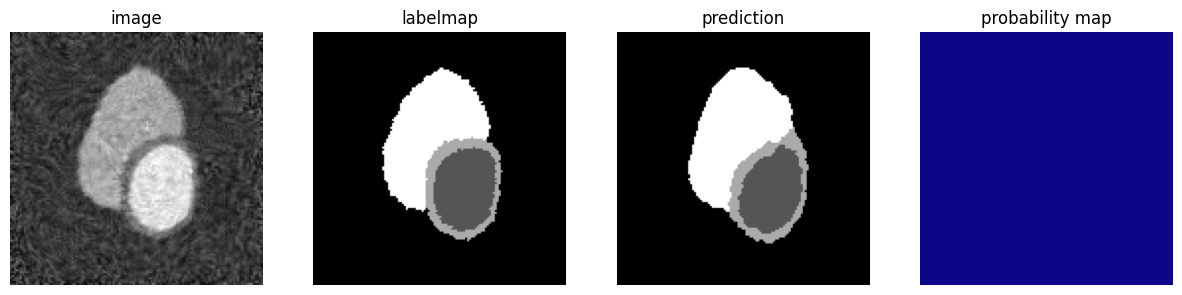

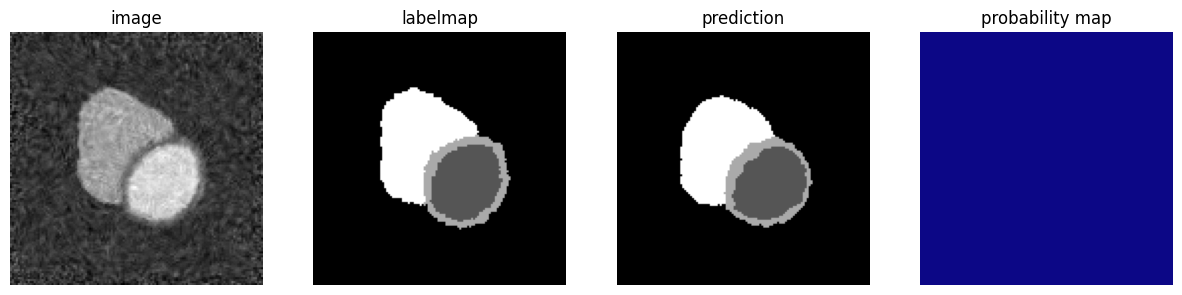

In [16]:
oss.probabilistic_sample = False
image_num = 0
batch = next(iter(data.test_dataloader()))
cuda_device = torch.device('cuda:0')
# vertical flip batch
# batch['image'] = torch.flip(batch['image'], [2])
# batch['labelmap'] = torch.flip(batch['labelmap'], [2])

batch['image'] = batch['image'][:2]

batch['labelmap'] = batch['labelmap'][:2]
batch['ground_truth'] = batch['ground_truth'][:2]
# move to gpu
batch = {k: v.to(cuda_device) for k, v in batch.items()}
oss.to(cuda_device)

with torch.no_grad():
    loss, dsc, probs, preds, _, _, _, attn = oss.process_batch(batch, 1)
image = batch['image'][image_num].squeeze().cpu()
labelmap = batch['labelmap'][image_num].squeeze().cpu()[0]
probmap = torch.max(probs.cpu(), dim=1, keepdim=True)[0].squeeze().detach().numpy()
predmap = preds[image_num].squeeze().cpu()

f, ax = plt.subplots(1,4, figsize=(15, 15))

ax[0].imshow(image, cmap=matplotlib.cm.gray)
ax[0].axis('off')
ax[0].set_title('image')

ax[1].imshow(labelmap, cmap=matplotlib.cm.gray)
ax[1].axis('off')
ax[1].set_title('labelmap')

ax[2].imshow(predmap, cmap=matplotlib.cm.gray)
ax[2].axis('off')
ax[2].set_title('prediction')

ax[3].imshow(probmap[image_num, ...], cmap='plasma')
ax[3].axis('off')
ax[3].set_title('probability map')

image_num += 1
image = batch['image'][image_num].squeeze().cpu()
labelmap = batch['labelmap'][image_num].squeeze().cpu()[0]
probmap = torch.max(probs.cpu(), dim=1, keepdim=True)[0].squeeze().detach().numpy()
predmap = preds[image_num].squeeze().cpu()

f, ax = plt.subplots(1,4, figsize=(15, 15))

ax[0].imshow(image, cmap=matplotlib.cm.gray)
ax[0].axis('off')
ax[0].set_title('image')

ax[1].imshow(labelmap, cmap=matplotlib.cm.gray)
ax[1].axis('off')
ax[1].set_title('labelmap')

ax[2].imshow(predmap, cmap=matplotlib.cm.gray)
ax[2].axis('off')
ax[2].set_title('prediction')

ax[3].imshow(probmap[image_num, ...], cmap='plasma')
ax[3].axis('off')
ax[3].set_title('probability map')

In [ ]:
# # plot attention matrix
# image_num = 0
# attn = attn[image_num, ...]#= oss.attn[image_num].cpu().detach().numpy()   
# # slot 0
# # slot_0_attn = attn[0, :]
# # slot_0_attn = slot_0_attn.reshape(14, 14)

batch = next(iter(data.test_dataloader()))
print(len(batch['image']))
print(len(batch['labelmap']))
f, ax = plt.subplots(1, len(batch['labelmap']), figsize=(15, 15))

for i, labelmap in enumerate(batch['labelmap'][0]):
    ax[i].imshow(labelmap.squeeze(), cmap=matplotlib.cm.gray)
    ax[i].axis('off')
    # ax[i].set_title(f'Labelmap {i}')

In [ ]:
f, ax = plt.subplots(1, len(batch['image'][0]), figsize=(3, 3))

for i, labelmap in enumerate(batch['image'][0]):
    ax.imshow(labelmap.squeeze(), cmap=matplotlib.cm.gray)
    ax.axis('off')
    # ax.set_title(f'Labelmap {i}')

In [ ]:
f, ax = plt.subplots(1, len(batch['ground_truth'][0]), figsize=(3, 3))

for i, labelmap in enumerate(batch['ground_truth'][0]):
    ax.imshow(labelmap.squeeze(), cmap=matplotlib.cm.gray)
    ax.axis('off')
    # ax.set_title(f'Labelmap {i}')

In [17]:
# calculate entropy of predictions
cuda_device = 'cuda:0'
image_num = 0
trials = 500
batch = next(iter(data.test_dataloader()))
batch['image'] = batch['image'][:5]

batch['labelmap'] = batch['labelmap'][:5]

list_entropy = []
#all_preds = torch.empty((batch['image'].shape[0], 224, 224), dtype=torch.long)
oss.to(cuda_device)
# random from v
oss.posterior_sample = True
batch = {k: v.to(cuda_device) for k, v in batch.items()}
for _ in range(trials):
    with torch.no_grad():
        loss, dsc, probs, preds, _, _, _, _ = oss.process_batch(batch, 1)
        #preds = torch.argmax(preds, dim=1)
        list_entropy.append(preds)

all_preds = torch.stack(list_entropy, dim=1)
oss.to('cpu')
del batch
print(all_preds.shape)

torch.Size([5, 500, 1, 128, 128])


Text(0.5, 1.0, 'Prediction Entropy')

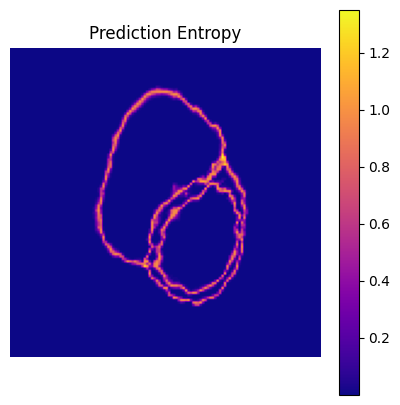

In [18]:
def calculate_class_entropy(predictions):
    """
    Calculate entropy of class predictions for each pixel.
    
    Args:
    predictions: Tensor of shape (N, H, W) where N is the number of predictions,
                 H and W are height and width. Values are class indices.
    
    Returns:
    entropy: Tensor of shape (H, W) containing entropy for each pixel
    """
    N, H, W = predictions.shape
    num_classes = predictions.max().item() + 1  # Assuming class indices start from 0
    
    # Create one-hot encoding
    one_hot = torch.zeros(N, num_classes, H, W, device=predictions.device)
    one_hot.scatter_(1, predictions.unsqueeze(1), 1)
    
    # Sum over the N dimension to get class counts
    class_counts = one_hot.sum(dim=0)  # Shape: (num_classes, H, W)
    
    # Calculate probabilities
    probabilities = class_counts / N
    
    # Add a small epsilon to avoid log(0)
    epsilon = 1e-7
    probabilities = torch.clamp(probabilities, epsilon, 1 - epsilon)
    
    # Calculate entropy
    entropy = -torch.sum(probabilities * torch.log2(probabilities), dim=0)
    
    return entropy

# Example usage
# Assuming 'stacked_predictions' is your tensor of shape (N, H, W)
image_num = 0
pixel_entropy = calculate_class_entropy(all_preds[image_num, ...].squeeze()).cpu()

f, ax = plt.subplots(1, 1, figsize=(5, 5))

# colorbar
mappable = ax.imshow(pixel_entropy, cmap='plasma')
f.colorbar(mappable, ax=ax)
ax.imshow(pixel_entropy, cmap='plasma')
ax.axis('off')
ax.set_title('Prediction Entropy')